## 1. Some Mathematical Theory

In this tutorial, I discuss three types moving average techniques. Before I discuss the mathematics, I will start by explaining what moving average means in layman's terms.

In mathematics, average is simply a value that represents the central value or the most occuring value in the dataset. There are three main types of average: arithmetic mean (your normal average), median, and mode. When we talk about average most people just assume the first one, that is, arithmetic mean or average. Assume you have the following simple dataset $D=[3, 7, 7, 8, 10]$. The mean, median and mode of this dataset is $7$.

In this tutorial, I will focus on the first one, the arithmetic mean; so when I say average I will be referring to arithmetic mean unless stated otherwise. Suppose you have the dataset $D=[d_1, d_2, ..., d_N]$ of $N$ numbers. Then your normal equally weighted average $A[D]$ is:
$$ A[D] = \frac{d_1+d_2+...+d_N}{N} = \frac{1}{N}\sum_{i=1}^{N} d_i $$.
From this formulation, one thing that you will notice is that this average $A[D]$ is a fixed, single number. Generally, it is given by:
$$ A[D] = \frac{\sum_{i=1}^{N} w_i d_i}{\sum_{i=1}^{N} w_i} $$.

Now, what if this average was dynamic? In a way that at each and every point $k$ within the dataset, so that for every $k=1,2,...N$, we get a new average up to that point. This is what moving average is - an average that changes with each position in the dataset. There are various types of moving averages. In this tutorial, I will look at two: simple moving average (SMA) and weighted moving average (WMA).

I will introduce what we call $\textit{window size}$ denoted by $n$ which is the number of points to average over. The following condition must always hold $1 < n \leq N$ and $n \leq k \leq N$ to ensure that there is smoothing. Let's see what this means with a simple numerical example using the dataset $D=[3, 7, 7, 8, 10]$. I have $N=5$ data points, so $n \leq k \leq 5$, meaning that can be $n=2, 3, 4, 5$. Why not $n=1$? That is because for $n=1$ there will be only one point in the dataset and that will be $d_k$ and that will be the simple moving average. For $n=2$, I have $2 \leq k \leq 5$, meaning $k=2,3,4,5$. This means that I will get four averages at $k=2,3,4,5$. This type of average is called simple moving average.

### Simple Moving Average
The simple moving average ensures that the data points in the dataset are equally weighted within the window:

$$ A_n [D]_k = \frac{1}{N} \sum_{i=0}^{n-1} d_{k-i}$$.

### Weighted Moving Average
The weighted moving average imposes weights on the data points within the window:
$$ A_{n, W} [D]_k = \frac{\sum_{i=0}^{n-1} w_i d_{k-i}}{\sum_{i=0}^{n-1} w_i}$$,
where we assume that $\sum_{i=0}^{n-1} w_i=1$.

There are other various types of moving averages such as expontential moving average, cumulative moving average, least squares moving average, among others.

## 2. Some Application 
Moving average is applied in various fields. Here, I will just provide three well-known applications: data smoothing, volatility filtering, and trading.

$\textbf{(a)}$. In data analysis, moving averages help reduce noise in datasets, making trends easier to identify and interpret by averaging fluctuations, which highlights core patterns in time-series data.

$\textbf{(b)}$. Moving averages reduce price fluctuations, making it easier to observe underlying price trends by smoothing out short-term volatility. This is particularly useful in technical analysis for identifying stable price movements.

$\textbf{(c)}$. In trading, moving averages are used to identify trends, generate buy/sell signals, and act as dynamic support and resistance levels. For example, a crossover strategy—where a short-term moving average crosses above a long-term one (Golden Cross)—signals a potential buy, while crossing below (Death Cross) signals a sell. Additionally, longer moving averages often serve as support or resistance, guiding traders on where to enter or exit trades.

## 3. Python Programs for SMA and WMA

In [175]:
import numpy as np

class MovingAverages:
    def __init__(self, data):
        self.data = data

    def get_sma(self, n=2):
        N = len(self.data)
        average = np.zeros(N - n + 1) 
        for k in range(n - 1, N):
            window_sum = 0
            for i in range(n):
                window_sum += self.data[k - i]
            average[k - (n - 1)] = window_sum / n  
        return average

    def get_wma(self, n=2):
        N = len(self.data)
        weights = [i + 1 for i in range(n)]  # Create weights as [1, 2, ..., n]
        weight_sum = sum(weights)  # Calculate the sum of weights
        normalized_weights = [w / weight_sum for w in weights]  
        average = np.zeros(N - n + 1)
        for k in range(n - 1, N):
            weighted_sum = 0
            for i in range(n):
                weighted_sum += normalized_weights[i] * self.data[k - i]  
            average[k - (n - 1)] = weighted_sum  
        return average

## 3. Sample Data and Visualization

In [176]:
D = [
    11.76, 10.50, 11.18, 12.54, 12.27, 9.53, 11.56, 10.56, 10.70, 11.32,
    11.15, 12.57, 11.97, 11.43, 11.86, 11.85, 13.11, 11.51, 12.13, 11.07,
    9.47, 12.77, 13.09, 11.58, 14.69, 11.07, 12.67, 12.54, 14.36, 14.40,
    13.19, 13.51, 12.34, 11.35, 13.09, 13.69, 14.87, 14.94, 13.45, 13.64,
    12.99, 12.72, 12.54, 16.29, 13.93, 14.11, 13.39, 15.52, 13.23, 14.74,
    14.16, 15.54, 14.74, 14.17, 15.43, 15.98, 15.72, 16.06, 15.22, 15.60,
    15.39, 15.80, 15.45, 14.64, 16.64, 16.16, 15.04, 17.23, 15.96, 17.02,
    17.80, 17.30, 18.41, 16.14, 17.88, 16.89, 16.81, 17.20, 17.57, 18.04,
    16.92, 19.08, 18.75, 16.85, 19.97, 20.48, 19.87, 18.61, 17.82, 20.04,
    18.69, 20.41, 19.50, 20.37, 19.85, 20.30, 19.71, 21.58, 20.03, 20.40
]

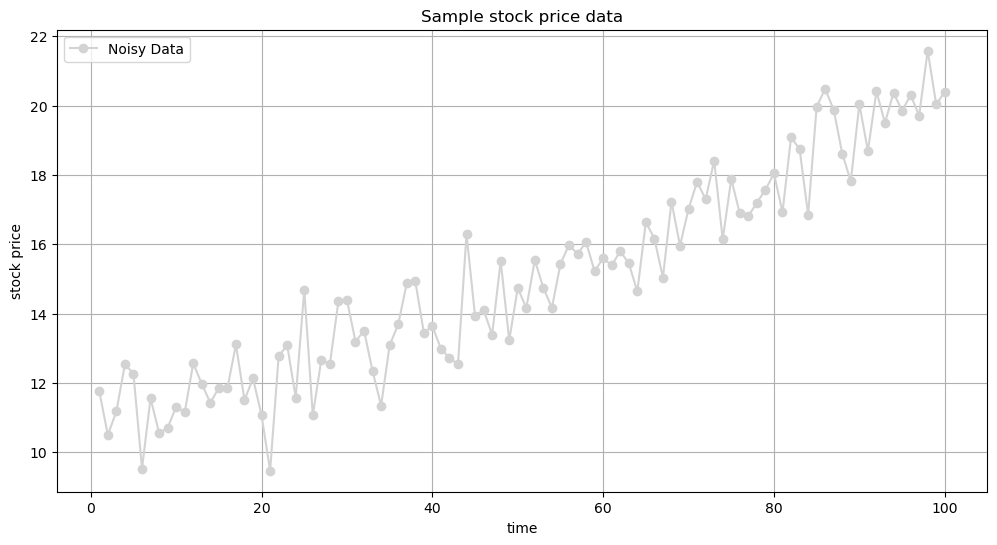

In [177]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(range(1, 101), D, label='Noisy Data', linestyle='-', marker='o', color='lightgray')
plt.xlabel('time')
plt.ylabel('stock price')
plt.title('Sample stock price data')
plt.legend()
plt.grid(True)
plt.show()

## 4. Numerical Examples

### 4.1 Analysis of SMA with different windows

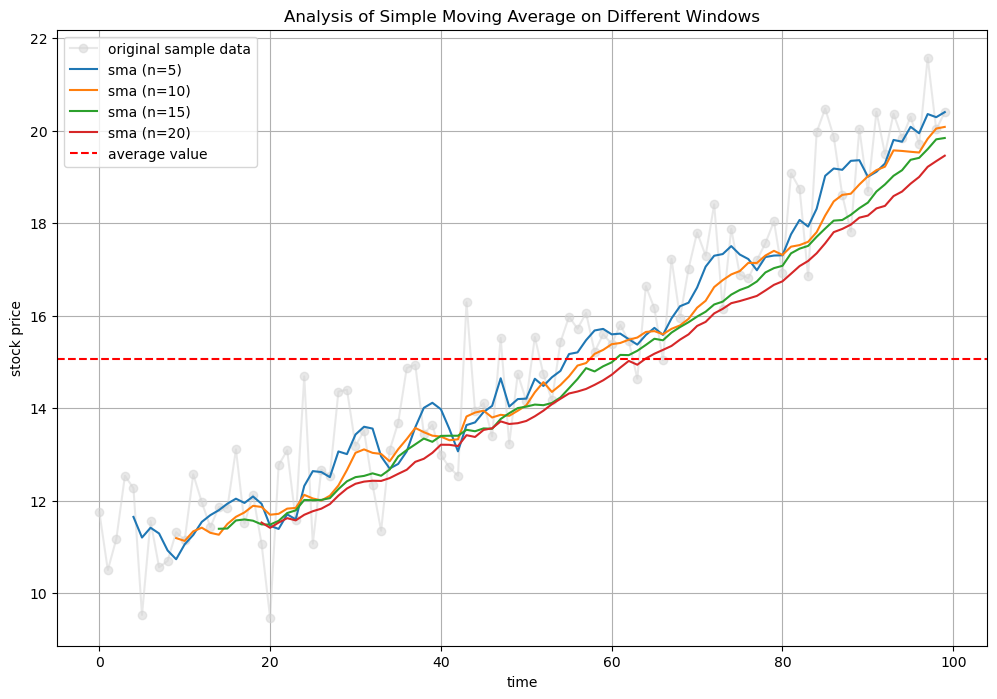

In [178]:
ma = MovingAverages(D)

average_value = sum(D) / len(D)

window_sizes = [5, 10, 15, 20]

plt.figure(figsize=(12, 8))
plt.plot(D, label='original sample data', linestyle='-', marker='o', color='lightgray', alpha=0.5)

for n in window_sizes:
    sma_output = ma.get_sma(n)  
    plt.plot(range(n - 1, len(D)), sma_output, label=f'sma (n={n})') 
    
plt.axhline(y=average_value, color='red', linestyle='--', label='average value')

plt.xlabel('time')
plt.ylabel('stock price')
plt.title('Analysis of Simple Moving Average on Different Windows')
plt.legend()
plt.grid(True)
plt.show()

### 4.2 Analysis of WMA with different windows

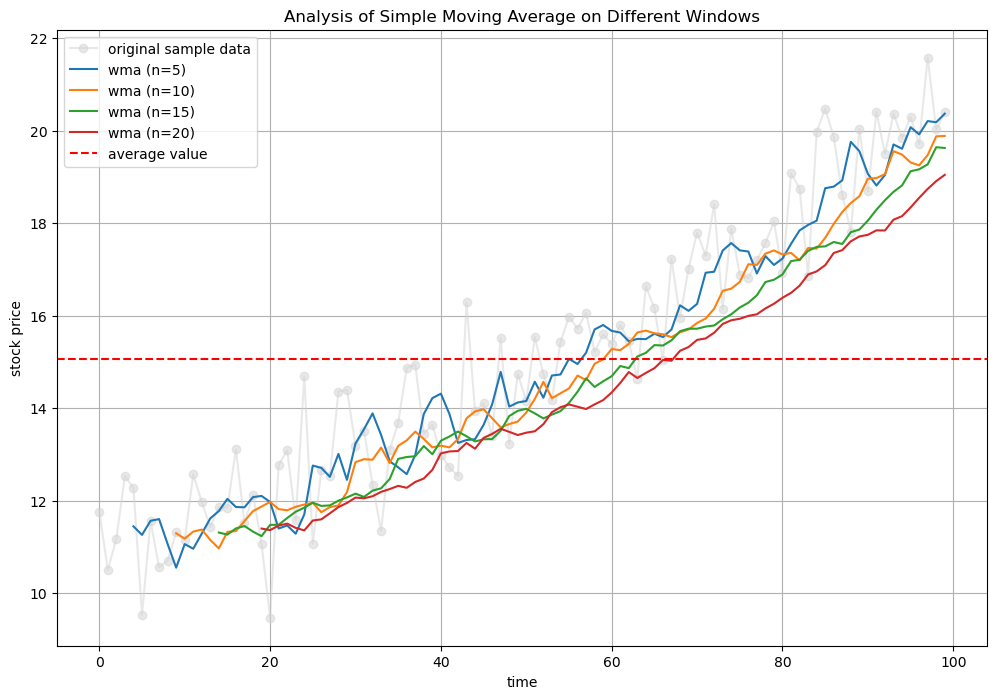

In [179]:
wma = MovingAverages(D)

average_value = sum(D) / len(D)

window_sizes = [5, 10, 15, 20]

plt.figure(figsize=(12, 8))
plt.plot(D, label='original sample data', linestyle='-', marker='o', color='lightgray', alpha=0.5)

for n in window_sizes:
    sma_output = wma.get_wma(n)  
    plt.plot(range(n - 1, len(D)), sma_output, label=f'wma (n={n})')  

# Plot the average as a horizontal line
plt.axhline(y=average_value, color='red', linestyle='--', label='average value')

plt.xlabel('time')
plt.ylabel('stock price')
plt.title('Analysis of Simple Moving Average on Different Windows')
plt.legend()
plt.grid(True)
plt.show()